In [117]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# For some reason on lab computers default background color is transparent.
# So I changed it to white.
mpl.rcParams["figure.facecolor"] = "#FFFFFF"


# https://www.mldata.io/dataset-details/school_grades/ 
# www.mldata.io redirects to www.apispreadsheets.com
# so i'm using this Scholl Grades dataset:
# https://www.apispreadsheets.com/datasets/110
# I think it's the same dataset.

# Read file
df = pd.read_csv('school_grades_dataset.csv')


## Let's start with simple relations.

## Free time vs going out with friends

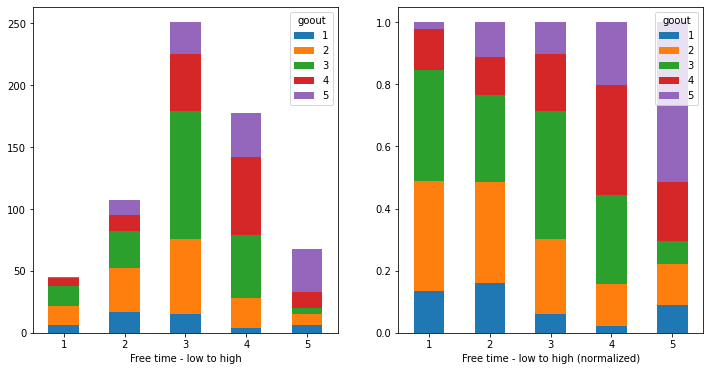

In [127]:
# ax = df.groupby(['goout','freetime']).size().unstack().plot(kind='bar',stacked=True)
a = df.groupby(['freetime','goout']).size().unstack()
a.plot(kind='bar',stacked=True)
plt.xticks(rotation = 0)
plt.gcf().set_size_inches(8,8)
plt.xlabel('Free time - low to high')



plt.show()

Most student have average amount of free time. Students with low amount of free time hang out less with their friends than students with more free time.


## Study time vs number of failed classes.

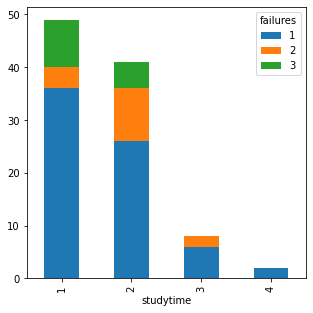

In [119]:
# 0 equals No. of failures so we skip it.
df.loc[df['failures'] > 0 ].groupby(['studytime','failures']).size().unstack().plot(kind='bar',stacked=True)
plt.gcf().set_size_inches(5,5)
plt.show()

We see that student that spend more time studying failed less.
## How many student's want to take higher education?

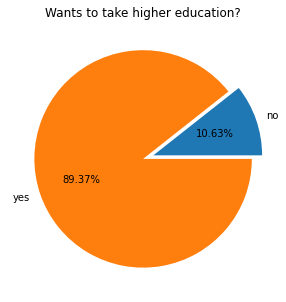

In [128]:
#higher
t = df.groupby('higher').size()
t.plot.pie(explode = [0.1,0.0], autopct='%.2f%%')
plt.title('Wants to take higher education?')
plt.gcf().set_size_inches(5,5)
plt.ylabel('')
plt.show()


## Is it affected by number of failed classes?

higher          no       yes
failures                    
0         0.065574  0.934426
1         0.285714  0.714286
2         0.437500  0.562500
3         0.428571  0.571429


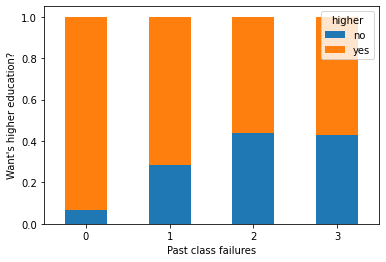

In [130]:
a = df.groupby(['failures', 'higher']).size().unstack()
# normalize data and crate stacked bar chart
a = a.div( a.sum(axis = 1), axis = 0)
print(a)
a.plot(kind = 'bar', stacked = True)
plt.ylabel("Want's higher education?")
plt.xlabel("Past class failures")
plt.show()

## Yes
93% of students that didn't failed any classes want to take higher education and students that failed some are less likely to continue studying.

## Do teachers' children have better scores?

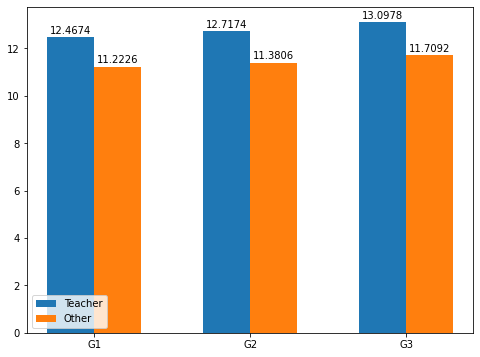

In [122]:
cols = ['G1','G2','G3']

# select students with at least one parent working as teacher
teacher = df.loc[(df['Mjob'] == 'teacher') | (df['Fjob'] == 'teacher')][cols]
# select every other student
other = df.loc[(df['Mjob'] != 'teacher') & (df['Fjob'] != 'teacher')][cols]

fig,ax = plt.subplots(figsize = (8,6))

x = np.arange(len(cols))
w = 0.3
r1 = ax.bar(x - w/2, teacher.mean(), w, label = 'Teacher')
r2 = ax.bar(x + w/2, other.mean(), w, label = 'Other')
ax.set_xticks(x)
ax.set_xticklabels(cols)
ax.bar_label(r1, padding = 2)
ax.bar_label(r2, padding = 2)
ax.legend(loc = 'lower left')
plt.show()

## Yes.


## Now let's check something different.
## Does parents' cohabitation status affects students' romantic relationships?

romantic        no       yes
Pstatus                     
A         0.562500  0.437500
T         0.641476  0.358524


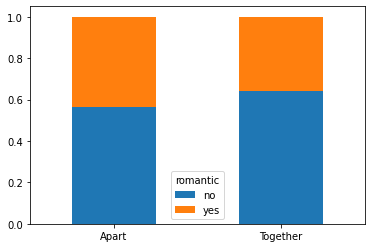

In [123]:
a = df.groupby(['Pstatus', 'romantic']).size().unstack()
a = a.div( a.sum(axis = 1), axis = 0)
print(a)
ax = a.plot(kind = 'bar', stacked = True)
# plt.xlabel("Are parents living [T]ogether or [A]part")
plt.xlabel('')
plt.xticks(rotation=0)
ax.set_xticklabels(['Apart','Together'])
plt.show()


## Difference is about 8% between them.
So we can assume that parent cohabitation doesn't affect students romantic relationships.

## But maybe student's age has something to do with it?

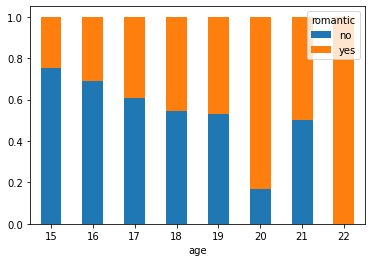

In [131]:
a = df.groupby(['age', 'romantic']).size().unstack()
a.div( a.sum(axis = 1), axis = 0).plot(kind = 'bar', stacked = True)
plt.xticks(rotation = 0)
plt.show()

## We see that with age more students are in relationships
But something happens after age of 19, we should check it.

In [125]:
print(df.groupby('age').size())

age
15    112
16    177
17    179
18    140
19     32
20      6
21      2
22      1
dtype: int64


In [126]:
lt19 = len(df.loc[df['age'] < 19].index) 
gte19 = len(df.loc[df['age'] >= 19].index)
print(lt19/(gte19+lt19))

0.9368258859784283


## That explains it. 
Our data contains mostly (93%) information about student below 19 years old.  